In [1]:
import numpy as np
import Loader
import Transformer
import matplotlib.pyplot as plt
import matplotlib.pyplot
plt.rcParams["font.family"] = "serif"
plt.style.use('dark_background')

C:\Users\Lemon\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#note loading data also shuffles order of the data
compoundsTrain, smilesTrain, labelsTrain, compoundDataTrain, activitiesTrain = Loader.getTrain(defaultValue=0)
compoundsTest, smilesTest, labelsTest, compoundDataTest, activitiesTest = Loader.getTest(defaultValue=0)
compoundsValidate, smilesValidate, labelsValidate, compoundDataValidate, activitiesValidate = Loader.getValidate(defaultValue=0)

In [11]:
def transformData(data): #use 24 entries, dMax, dMean, dScores, fMax, fMean, fScores
    dData = abs(data[:,0:10]) #docking, force positive
    fData = abs(data[:,10:20]) #fusion, force positive
    
    data2 = np.zeros((len(data), 24))
    
    data2[:,0] = np.max(dData, axis=1)
    data2[:,1] = np.mean(dData, axis=1)
    data2[:,2:12] = dData #docking
    data2[:,12] = np.max(fData, axis=1)
    data2[:,13] = np.mean(fData, axis=1)
    data2[:,14:] = fData #fusion
    
    return data2
    
dataTrain = transformData(compoundDataTrain)
dataVal = transformData(compoundDataValidate)
dataTest = transformData(compoundDataTest)

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import MeanSquaredError

In [12]:
print(dataTrain[0:10], Transformer.toBinaryClassification(activitiesTrain)[0:10])

[[8.9        8.57       8.9        8.7        8.7        8.7
  8.6        8.6        8.5        8.4        8.3        8.3
  5.32437277 5.21174688 5.14693213 5.24866295 5.21557236 5.2826376
  5.32437277 5.1429472  5.13157892 5.20796633 5.14015293 5.27664566]
 [7.9        7.67       7.9        7.8        7.7        7.7
  7.7        7.6        7.6        7.6        7.6        7.5
  5.4638834  5.28247318 5.4638834  5.27825928 5.39195681 5.25636292
  5.3907218  5.20226049 5.23386955 5.28116417 5.2155571  5.11069632]
 [6.8        6.63       6.8        6.8        6.8        6.8
  6.7        6.7        6.6        6.4        6.4        6.3
  4.96574306 4.88087935 4.87079716 4.96423626 4.84894657 4.93480778
  4.91211224 4.96574306 4.96079254 4.89563847 4.72736454 4.72835493]
 [7.6        7.25       7.6        7.5        7.4        7.4
  7.4        7.3        7.1        7.         6.9        6.9
  5.48986435 5.36163869 5.23507452 5.31166458 5.31690121 5.34733152
  5.34429646 5.36003637 5.32851076

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(len(dataTrain[0]), activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(dataTrain, Transformer.toBinaryClassification(activitiesTrain), epochs=300)

Epoch 1/300
85/85 [==============================] - 1s 2ms/step - loss: 0.6634 - accuracy: 0.6213
Epoch 2/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.6389
Epoch 3/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.6389
Epoch 4/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.6489
Epoch 5/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.6470
Epoch 6/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.6426
Epoch 7/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.6529
Epoch 8/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.6492
Epoch 9/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.6570
Epoch 10/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.6489
Epoch 11/

85/85 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.6643
Epoch 84/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.6629
Epoch 85/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6219 - accuracy: 0.6713
Epoch 86/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.6665
Epoch 87/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.6710
Epoch 88/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6244 - accuracy: 0.6625
Epoch 89/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6235 - accuracy: 0.6632
Epoch 90/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.6654
Epoch 91/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.6665
Epoch 92/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.6640
Epoch 93/300


85/85 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.6658
Epoch 165/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.6699
Epoch 166/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.6636
Epoch 167/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.6783
Epoch 168/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.6724
Epoch 169/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.6684
Epoch 170/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6156 - accuracy: 0.6750
Epoch 171/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.6735
Epoch 172/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.6688
Epoch 173/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6191 - accuracy: 0.6695
Epoc

85/85 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.6838
Epoch 246/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.6702
Epoch 247/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.6761
Epoch 248/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.6780
Epoch 249/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.6802
Epoch 250/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.6750
Epoch 251/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.6739
Epoch 252/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.6750
Epoch 253/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6147 - accuracy: 0.6710
Epoch 254/300
85/85 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.6849
Epoc

In [21]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(len(compoundDataTrain[0]), activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(2)
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model2.fit(dataTrain, Transformer.toBinaryClassification(activitiesTrain), epochs=300)

Epoch 1/300
85/85 [==============================] - 1s 4ms/step - loss: 0.6605 - accuracy: 0.6176
Epoch 2/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6594 - accuracy: 0.6220
Epoch 3/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6489 - accuracy: 0.6331
Epoch 4/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6496 - accuracy: 0.6445
Epoch 5/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6439 - accuracy: 0.6511
Epoch 6/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6465 - accuracy: 0.6496
Epoch 7/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6412 - accuracy: 0.6448
Epoch 8/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6416 - accuracy: 0.6515
Epoch 9/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6412 - accuracy: 0.6529
Epoch 10/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6395 - accuracy: 0.6540
Epoch 11/

85/85 [==============================] - 0s 5ms/step - loss: 0.6330 - accuracy: 0.6599
Epoch 84/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6357 - accuracy: 0.6614
Epoch 85/300
85/85 [==============================] - 1s 7ms/step - loss: 0.6334 - accuracy: 0.6570
Epoch 86/300
85/85 [==============================] - 0s 5ms/step - loss: 0.6307 - accuracy: 0.6621
Epoch 87/300
85/85 [==============================] - 0s 5ms/step - loss: 0.6342 - accuracy: 0.6588
Epoch 88/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6310 - accuracy: 0.6625
Epoch 89/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6281 - accuracy: 0.6621
Epoch 90/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6322 - accuracy: 0.6570
Epoch 91/300
85/85 [==============================] - 0s 5ms/step - loss: 0.6332 - accuracy: 0.6592
Epoch 92/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6314 - accuracy: 0.6584
Epoch 93/300


85/85 [==============================] - 0s 4ms/step - loss: 0.6229 - accuracy: 0.6654
Epoch 165/300
85/85 [==============================] - 0s 5ms/step - loss: 0.6301 - accuracy: 0.6662
Epoch 166/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6262 - accuracy: 0.6684
Epoch 167/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6225 - accuracy: 0.6651
Epoch 168/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6311 - accuracy: 0.6555
Epoch 169/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6254 - accuracy: 0.6710
Epoch 170/300
85/85 [==============================] - 0s 5ms/step - loss: 0.6262 - accuracy: 0.6618
Epoch 171/300
85/85 [==============================] - 1s 6ms/step - loss: 0.6234 - accuracy: 0.6684
Epoch 172/300
85/85 [==============================] - 1s 7ms/step - loss: 0.6248 - accuracy: 0.6658
Epoch 173/300
85/85 [==============================] - 1s 8ms/step - loss: 0.6252 - accuracy: 0.6688
Epoc

85/85 [==============================] - 0s 4ms/step - loss: 0.6191 - accuracy: 0.6783
Epoch 246/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6188 - accuracy: 0.6743
Epoch 247/300
85/85 [==============================] - 0s 5ms/step - loss: 0.6225 - accuracy: 0.6706
Epoch 248/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6204 - accuracy: 0.6772
Epoch 249/300
85/85 [==============================] - 0s 5ms/step - loss: 0.6198 - accuracy: 0.6768
Epoch 250/300
85/85 [==============================] - 0s 5ms/step - loss: 0.6232 - accuracy: 0.6669
Epoch 251/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6195 - accuracy: 0.6743
Epoch 252/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6244 - accuracy: 0.6684
Epoch 253/300
85/85 [==============================] - 0s 5ms/step - loss: 0.6216 - accuracy: 0.6680
Epoch 254/300
85/85 [==============================] - 0s 5ms/step - loss: 0.6194 - accuracy: 0.6743
Epoc

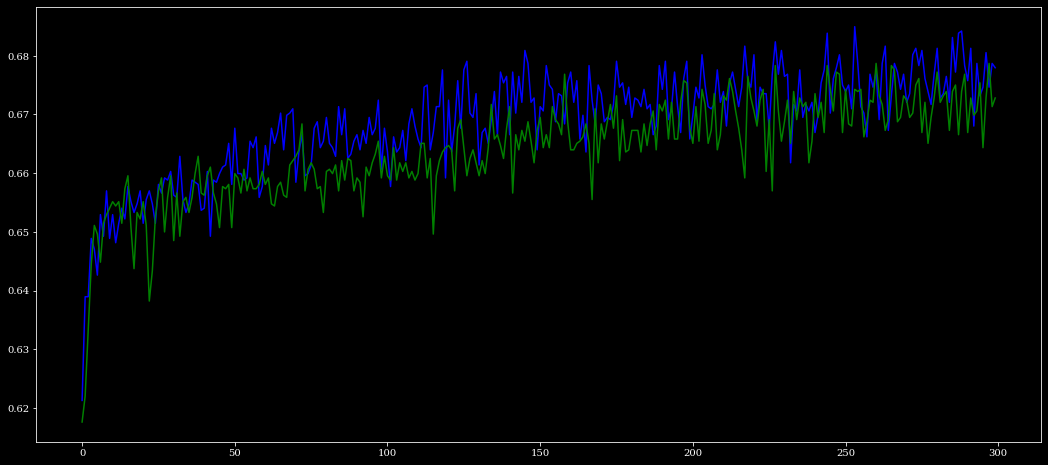

In [25]:
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(history.history["accuracy"], "blue")
ax.plot(history2.history["accuracy"], "green")